In [244]:
import os
import glob
import seaborn as sns 
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd

In [245]:
logs = glob.glob('../logs/*cifar100_seed*layers-12*warmup*L2.csv')

In [246]:
rows = []
for log in logs:
    try:
        df = pd.read_csv(log, header=None)
        name = log.split('/')[-1][:-4]
        _, seed, _, relax, warmup, _ = name.split('-')
        relax = float(relax.split('_')[0])
        seed = int(seed.split('_')[0])
        warmup = int(warmup.split('_')[0])
        post_warmup = df[warmup:]
        best_epoch = post_warmup[:][1].idxmax()
        rows.append([seed, relax, warmup] + list(post_warmup.iloc[best_epoch-warmup]))
    except:
        pass

In [247]:
rows

[[2, 1.0, 0, 1.0, 1.14, 0.0092964634895324, 132871768.0],
 [2, 1.0, 10, 25.0, 17.49, 0.0069485294818878, 12193761280.0],
 [2, 10.0, 10, 24.0, 24.55, 0.0061473134279251, 5.467618987011473e+18],
 [2, 100.0, 0, 110.0, 17.22, 0.0070561863660812, 38635528192.0],
 [2, 2.0, 10, 21.0, 22.33, 0.0063792459011077, 3730395103232.0],
 [2, 20.0, 10, 19.0, 27.18, 0.0058784384489059, 6.5027131620131e+21],
 [2, 3.0, 0, 91.0, 17.51, 0.0140385625362396, 975955951616.0],
 [2, 4.0, 0, 91.0, 17.51, 0.0140385625362396, 975955558400.0],
 [2, 50.0, 0, 91.0, 17.51, 0.0140385625362396, 975954575360.0],
 [2, 50.0, 10, 34.0, 34.77, 0.0101944408655166, 3.9743422152731486e+28]]

In [248]:
# seed, relax, warmup, epoch, acc, loss, lip
relax1 = [1.0, 2.0, 3.0, 4.0, 5.0, 10.0]
acc1 = [19.75, 41.89, 43.56, 63.82, 65.12, 67.82]
lip1 = [680472512, 19964454912, 60161472000, 611611197441, 629618775042, 7836187750432]
epochs1 = [71, 64, 61, 58, 55, 52]

relax2 = [1.0, 2.0, 3.0, 4.0, 5.0, 10.0]
acc2 = [23.79, 47.91, 52.34, 65.21, 67.33, 69.29]
lip2 = [503332455, 64454912199, 69472000601, 97446116111, 877504629612, 8361877504729]
epochs2 = [79, 69, 71, 63, 61, 59]

relax3 = [1.0, 2.0, 3.0, 4.0, 5.0, 10.0]
acc3 = [32.82, 52.13, 55.82, 65.78, 66.01, 69.01]
lip3 = [2251503391, 49121991145, 947620601010, 6197441612678, 8825214328612, 636192712722339]
epochs3 = [123, 118, 107, 103, 91, 89]

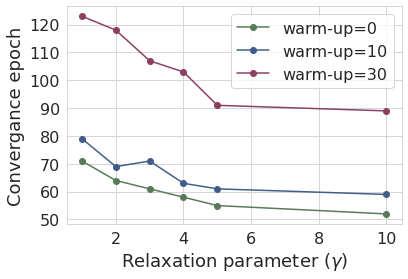

In [249]:
sns.set_style('whitegrid')
plt.plot(relax1, epochs1, label='warm-up=0', marker='o',color='#587A58')
plt.plot(relax2, epochs2, label='warm-up=10', marker='o',color='#3F5D8A')
plt.plot(relax3, epochs3, label='warm-up=30', marker='o',color='#8A3F63')
plt.legend(fontsize=16)
plt.xlabel(r'Relaxation parameter ($\gamma$)', fontsize=18)
plt.ylabel('Convergance epoch', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('cifar10_epochs.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

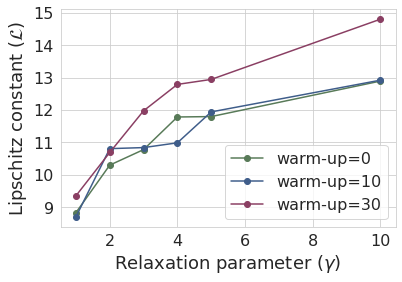

In [250]:
sns.set_style('whitegrid')
plt.plot(relax1, np.log10(lip1), label='warm-up=0', marker='o', color='#587A58')
plt.plot(relax2, np.log10(lip2), label='warm-up=10', marker='o', color='#3F5D8A')
plt.plot(relax3, np.log10(lip3), label='warm-up=30', marker='o', color='#8A3F63')
plt.legend(fontsize=16)
plt.xlabel(r'Relaxation parameter ($\gamma$)', fontsize=18)
plt.ylabel(r'Lipschitz constant ($\mathcal{L}$)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('cifar10_lips.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

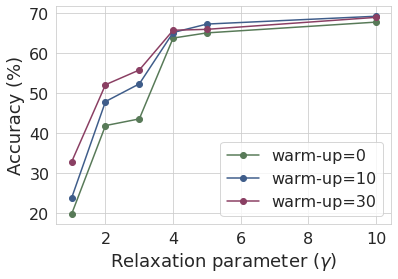

In [251]:
sns.set_style('whitegrid')
plt.plot(relax1, acc1, label='warm-up=0', marker='o',color='#587A58')
plt.plot(relax2, acc2, label='warm-up=10', marker='o',color='#3F5D8A')
plt.plot(relax3, acc3, label='warm-up=30', marker='o',color='#8A3F63')
plt.legend(fontsize=16)
plt.xlabel(r'Relaxation parameter ($\gamma$)', fontsize=18)
plt.ylabel(r'Accuracy (%)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('cifar10_accs.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

In [252]:
# seed, relax, warmup, epoch, acc, loss, lip
relax1 = [1.0, 2.0, 3.0, 4.0, 5.0, 10.0]
acc1 = [6.75, 17.22, 17.49, 48.25, 49.76, 51.87]
lip1 = [568872512, 103225300992,  23008635560960, 197500953592320, 292231018774052, 1027836187750432]
epochs1 = [101, 92, 91, 88, 85, 72]

relax2 = [1.0, 2.0, 3.0, 4.0, 5.0, 10.0]
acc2 = [14.51, 29.37, 31.28, 52.01, 52.67, 52.79]
lip2 = [688752512, 300992103225,  35560960230086, 259232019750095, 292273101875043, 1870278361750432]
epochs2 = [132, 121, 114, 108, 107, 88]

relax3 = [1.0, 2.0, 3.0, 4.0, 5.0, 10.0]
acc3 = [17.29, 30.21, 31.17, 52.60, 51.98, 52.89]
lip3 = [875682152, 412992103225,  53560960230086, 519923752090205, 312382011768021, 1871272333451389]
epochs3 = [149, 136, 120, 111, 105, 93]

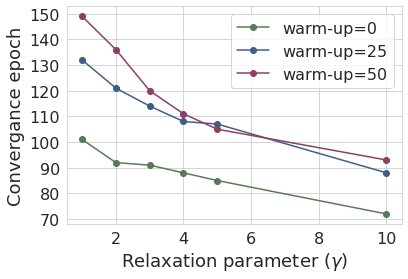

In [253]:
sns.set_style('whitegrid')
plt.plot(relax1, epochs1, label='warm-up=0', marker='o',color='#587A58')
plt.plot(relax2, epochs2, label='warm-up=25', marker='o',color='#3F5D8A')
plt.plot(relax3, epochs3, label='warm-up=50', marker='o',color='#8A3F63')
plt.legend(fontsize=16)
plt.xlabel(r'Relaxation parameter ($\gamma$)', fontsize=18)
plt.ylabel('Convergance epoch', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('cifar100_epochs.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

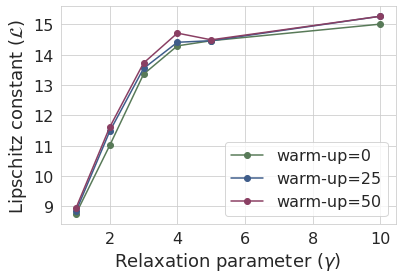

In [254]:
sns.set_style('whitegrid')
plt.plot(relax1, np.log10(lip1), label='warm-up=0', marker='o', color='#587A58')
plt.plot(relax2, np.log10(lip2), label='warm-up=25', marker='o', color='#3F5D8A')
plt.plot(relax3, np.log10(lip3), label='warm-up=50', marker='o', color='#8A3F63')
plt.legend(fontsize=16)
plt.xlabel(r'Relaxation parameter ($\gamma$)', fontsize=18)
plt.ylabel(r'Lipschitz constant ($\mathcal{L}$)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('cifar100_lips.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

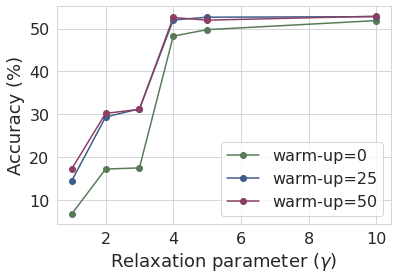

In [255]:
sns.set_style('whitegrid')
plt.plot(relax1, acc1, label='warm-up=0', marker='o',color='#587A58')
plt.plot(relax2, acc2, label='warm-up=25', marker='o',color='#3F5D8A')
plt.plot(relax3, acc3, label='warm-up=50', marker='o',color='#8A3F63')
plt.legend(fontsize=16)
plt.xlabel(r'Relaxation parameter ($\gamma$)', fontsize=18)
plt.ylabel(r'Accuracy (%)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('cifar100_accs.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

In [256]:
relax = [0.01,0.05,0.1,0.2,0.5,1.01,1.02,1.05,1.1,1.2,1.5,2.0,2.5,3.0,5.0]

In [257]:
acc_df = pd.read_csv('accuracy_mnist.csv', header=None)
lip_df = pd.read_csv('lip_mnist.csv', header=None)
epoch_df = pd.read_csv('index_mnist.csv', header=None)


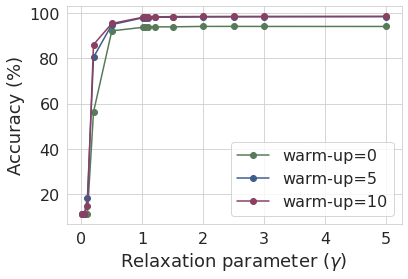

In [258]:
sns.set_style('whitegrid')
plt.plot(relax, epoch_df[0], label='warm-up=0', marker='o',color='#587A58')
plt.plot(relax, epoch_df[1], label='warm-up=5', marker='o',color='#3F5D8A')
plt.plot(relax, epoch_df[2], label='warm-up=10', marker='o',color='#8A3F63')
plt.legend(fontsize=16)
plt.xlabel(r'Relaxation parameter ($\gamma$)', fontsize=18)
plt.ylabel('Convergance epoch', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('mnist_epochs.pdf', transparent=True, bbox_inches='tight', pad_inches=0)
plt.close()

sns.set_style('whitegrid')
plt.plot(relax, np.log10(lip_df[0]), label='warm-up=0', marker='o', color='#587A58')
plt.plot(relax, np.log10(lip_df[1]), label='warm-up=5', marker='o', color='#3F5D8A')
plt.plot(relax, np.log10(lip_df[2]), label='warm-up=10', marker='o', color='#8A3F63')
plt.legend(fontsize=16)
plt.xlabel(r'Relaxation parameter ($\gamma$)', fontsize=18)
plt.ylabel(r'Lipschitz constant ($\mathcal{L}$)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('mnist_lips.pdf', transparent=True, bbox_inches='tight', pad_inches=0)
plt.close()

sns.set_style('whitegrid')
plt.plot(relax, acc_df[0], label='warm-up=0', marker='o',color='#587A58')
plt.plot(relax, acc_df[1], label='warm-up=5', marker='o',color='#3F5D8A')
plt.plot(relax, acc_df[2], label='warm-up=10', marker='o',color='#8A3F63')
plt.legend(fontsize=16)
plt.xlabel(r'Relaxation parameter ($\gamma$)', fontsize=18)
plt.ylabel(r'Accuracy (%)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('mnist_accs.pdf', transparent=True, bbox_inches='tight', pad_inches=0)